In [5]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#from plotly.offline import init_notebook_mode, iplot

#print __version__ # requires version >= 1.9.0

plot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])
init_notebook_mode(connected=True)
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])


NameError: name 'go' is not defined

In [1]:
# system
import sys

In [6]:
# TC
from PyQuantum.TC.Cavity import *
from PyQuantum.TC.Hamiltonian import *

from PyQuantum.TC.WaveFunction import *
from PyQuantum.TC.DensityMatrix import *

from PyQuantum.TC.Evolution import *

In [7]:
# Common
from PyQuantum.Common.LoadPackage import *
from PyQuantum.Common.STR import *

from PyQuantum.Common.ext import mkdir
from PyQuantum.Common.PyPlot import PyPlot3D
# from shutil import copyfile
# from numpy.random import rand

In [13]:
import PyQuantum.examples.TC.config as config

mkdir(config.path)

In [14]:
cavity = Cavity(n=config.n, wc=config.wc, wa=config.wa, g=config.g)

print("Cavity:", color="green")

print()

cavity.print_n()
cavity.print_wc()
cavity.print_wa()
cavity.print_g()

print("T:", config.T)
print("nt:", config.nt)
print("dt:", config.dt)

Cavity:
 n: 3

wc: 0.2 Hz

wa: 0.2 Hz

 g: 1.0 Hz

T: 100
nt: 500
dt: 0.2


In [15]:
H = Hamiltonian(capacity=config.capacity, cavity=cavity)

if __debug__:
    print("Hamiltonian states:", color="green")
    # H.print()
    print()

    H.print_states()

    H.write_to_file(filename=config.H_csv)
    # H.print_html(filename=H_html)

Hamiltonian states:
States:
[0, [0, 0, 0]]
[0, [0, 0, 1]]
[0, [0, 1, 0]]
[0, [0, 1, 1]]
[0, [1, 0, 0]]
[0, [1, 0, 1]]
[0, [1, 1, 0]]
[0, [1, 1, 1]]
[1, [0, 0, 0]]
[1, [0, 0, 1]]
[1, [0, 1, 0]]
[1, [0, 1, 1]]
[1, [1, 0, 0]]
[1, [1, 0, 1]]
[1, [1, 1, 0]]
[1, [1, 1, 1]]
[2, [0, 0, 0]]
[2, [0, 0, 1]]
[2, [0, 1, 0]]
[2, [0, 1, 1]]
[2, [1, 0, 0]]
[2, [1, 0, 1]]
[2, [1, 1, 0]]
[2, [1, 1, 1]]
[3, [0, 0, 0]]
[3, [0, 0, 1]]
[3, [0, 1, 0]]
[3, [0, 1, 1]]
[3, [1, 0, 0]]
[3, [1, 0, 1]]
[3, [1, 1, 0]]
[3, [1, 1, 1]]



In [16]:
w_0 = WaveFunction(states=H.states, init_state=config.init_state)

w_0.normalize()
w_0.print()

if __debug__:
    print("Wave Function:", color="green")

    print()

    w_0.print()

[0, [0, 0, 0]] 0j
[0, [0, 0, 1]] 0j
[0, [0, 1, 0]] 0j
[0, [0, 1, 1]] 0j
[0, [1, 0, 0]] 0j
[0, [1, 0, 1]] 0j
[0, [1, 1, 0]] 0j
[0, [1, 1, 1]] 0j
[1, [0, 0, 0]] 0j
[1, [0, 0, 1]] 0j
[1, [0, 1, 0]] 0j
[1, [0, 1, 1]] 0j
[1, [1, 0, 0]] 0j
[1, [1, 0, 1]] 0j
[1, [1, 1, 0]] 0j
[1, [1, 1, 1]] 0j
[2, [0, 0, 0]] 0j
[2, [0, 0, 1]] 0j
[2, [0, 1, 0]] (1+0j)
[2, [0, 1, 1]] 0j
[2, [1, 0, 0]] 0j
[2, [1, 0, 1]] 0j
[2, [1, 1, 0]] 0j
[2, [1, 1, 1]] 0j
[3, [0, 0, 0]] 0j
[3, [0, 0, 1]] 0j
[3, [0, 1, 0]] 0j
[3, [0, 1, 1]] 0j
[3, [1, 0, 0]] 0j
[3, [1, 0, 1]] 0j
[3, [1, 1, 0]] 0j
[3, [1, 1, 1]] 0j
Wave Function:
[0, [0, 0, 0]] 0j
[0, [0, 0, 1]] 0j
[0, [0, 1, 0]] 0j
[0, [0, 1, 1]] 0j
[0, [1, 0, 0]] 0j
[0, [1, 0, 1]] 0j
[0, [1, 1, 0]] 0j
[0, [1, 1, 1]] 0j
[1, [0, 0, 0]] 0j
[1, [0, 0, 1]] 0j
[1, [0, 1, 0]] 0j
[1, [0, 1, 1]] 0j
[1, [1, 0, 0]] 0j
[1, [1, 0, 1]] 0j
[1, [1, 1, 0]] 0j
[1, [1, 1, 1]] 0j
[2, [0, 0, 0]] 0j
[2, [0, 0, 1]] 0j
[2, [0, 1, 0]] (1+0j)
[2, [0, 1, 1]] 0j
[2, [1, 0, 0]] 0j
[2, [1, 0, 1]] 0j
[2, [

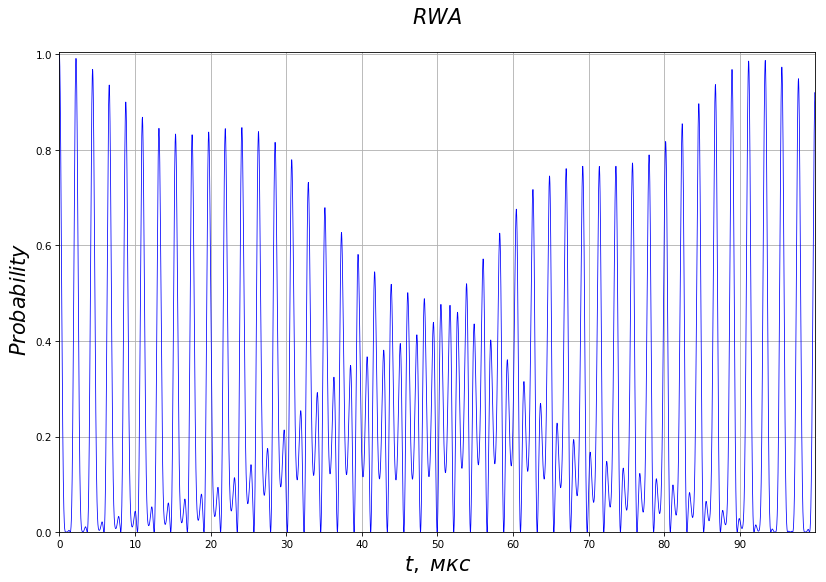

In [17]:
title = r'$RWA$'+'\n'
color = 'blue'

run_RWA(w0=w_0, H=H, t0=0, t1=config.T, nt=config.nt, initstate=config.init_state,
        certain_state=config.certain_state, ymin=0, ymax=1.005, title=title, color=color)